### Example 7

Refer to [/examples/time_series/generate_data.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/generate_data.ipynb) for the artificial time-series dataset (used in this example) generation  

|Case|LSTM Shuffled|Dense Shuffled|LSTM Not Shuffled|Dense Not Shuffled|
|-|-|-|-|-|
|Example Number|[2](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/2.ipynb)|[3](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/3.ipynb)|7|[17](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/17.ipynb)|
|ID|0_1_0_3_128_1_0_1_0_0|0_1_0_3_128_1_1_1_0_0|0_1_0_3_128_1_0_0_0_0|0_1_0_3_128_1_1_0_0_0|
|Total params|17,185|18,753|17,185|18,753|
|Total time (min)|1.5|0.3|2.3|0.3|
|Num of epochs|49|37|78|26|
|Time per epoch (s)|1.79|0.51|1.78|0.60|
|Train RMSE|0.53|0.63|0.57|0.79|
|Test RMSE|0.58|0.88|0.64|0.98|

- LSTM performs better than MLP when there is a relatively complex within window input/output relationship
- Shuffling inputs improves the performance both for MLP (multi layer perceptron or dense) and LSTM
- MLP is much faster than LSTM with similar size in terms of training times

Previous example: [/examples/time_series/cases/6.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/6.ipynb)  
Next example: [/examples/time_series/cases/8.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/8.ipynb)

In [1]:
import sys
sys.path.insert(0, '../') # To be able to reach 'functions.py'
sys.path.insert(0, '../../../') # To be able to reach 'datasets' folder
import functions as fn

In [2]:
# Do the settings in this cell and run all
class Train_Sets:
    vers = 0 # 0 or 1
    within = 1 # 0 or 1
    inter = 0 # 0 or 1
    numOfSens = 3 # 1 or 2 or 3
    batchSize = 128 # (2 ** 0) or ... or (2 ** 8)
    useHalf = True # False or True
    dense = False # False or True
    shuffle = False # False or True
    stateful = False # False or True
    resetStates = False # False or True

In [3]:
Train_Sets, Paths = fn.init(Train_Sets)

ID: 0_1_0_3_128_1_0_0_0_0


In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = fn.split_data(Train_Sets)

X_train shape:      (9216, 32, 3)
y_train shape:      (9216,)
X_val shape:        (3072, 32, 3)
y_val shape:        (3072,)
X_test shape:       (3072, 32, 3)
y_test shape:       (3072,)
Common data type:   <class 'numpy.float32'>


In [5]:
model, df, train_time = fn.get_model(Train_Sets, X_train, X_val, y_train, y_val)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-11 22:56:43.687208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 22:56:43.687479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/128


2022-12-11 22:56:44.268278: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 22:56:45.207630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:45.379098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:46.341904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:46.657234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:47.269089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/72 [============================>.] - ETA: 0s - loss: 19.9798 - root_mean_squared_error: 4.4699 - mean_absolute_error: 3.4505

2022-12-11 22:56:49.323738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:49.389424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:56:49.458312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - 6s 33ms/step - loss: 19.7752 - root_mean_squared_error: 4.4469 - mean_absolute_error: 3.4287 - val_loss: 4.4203 - val_root_mean_squared_error: 2.1024 - val_mean_absolute_error: 1.6686
Epoch 2/128
72/72 [==============================] - 2s 24ms/step - loss: 3.7212 - root_mean_squared_error: 1.9290 - mean_absolute_error: 1.5272 - val_loss: 2.6961 - val_root_mean_squared_error: 1.6420 - val_mean_absolute_error: 1.2874
Epoch 3/128
72/72 [==============================] - 2s 25ms/step - loss: 2.3552 - root_mean_squared_error: 1.5347 - mean_absolute_error: 1.1981 - val_loss: 1.9251 - val_root_mean_squared_error: 1.3875 - val_mean_absolute_error: 1.0641
Epoch 4/128
72/72 [==============================] - 2s 24ms/step - loss: 1.7577 - root_mean_squared_error: 1.3258 - mean_absolute_error: 1.0275 - val_loss: 1.4154 - val_root_mean_squared_error: 1.1897 - val_mean_absolute_error: 0.9197
Epoch 5/128
72/72 [==============================] - 2s 24ms/step -

INFO:tensorflow:Assets written to: /Users/serhatsoyer/Repos/py4ML/datasets/time_series/cases/0_1_0_3_128_1_0_0_0_0/model/assets


INFO:tensorflow:Assets written to: /Users/serhatsoyer/Repos/py4ML/datasets/time_series/cases/0_1_0_3_128_1_0_0_0_0/model/assets


In [6]:
model.summary()

Model: "0_1_0_3_128_1_0_0_0_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1 (LSTM)                (128, 32, 32)             4608      
                                                                 
 lstm2 (LSTM)                (128, 32)                 8320      
                                                                 
 dense3 (Dense)              (128, 32)                 1056      
                                                                 
 dense4 (Dense)              (128, 32)                 1056      
                                                                 
 dense5 (Dense)              (128, 32)                 1056      
                                                                 
 drop0.0625 (Dropout)        (128, 32)                 0         
                                                                 
 dense6 (Dense)              (128, 32)       

In [7]:
fn.train_info(df, train_time)

Total training time:          2.3 min
Num of epochs:                78
Best val RMSE epoch:          70
Training time per epoch:      1.78 sec


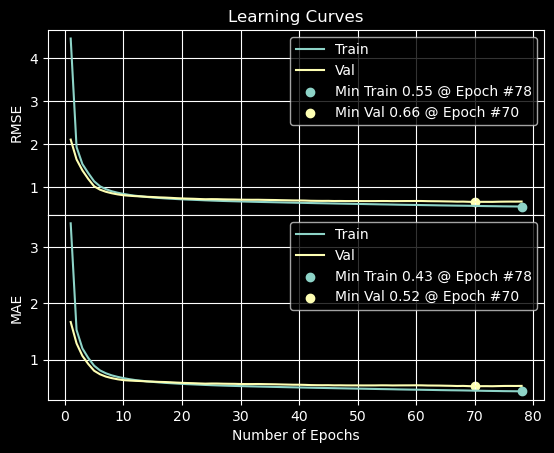

In [8]:
fn.plot_learn_curve(df)

In [9]:
y_train_pred, y_val_pred, y_test_pred = fn.get_predictions(Train_Sets, model, X_train, X_val, X_test)

2022-12-11 22:59:10.194996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:59:10.259358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-11 22:59:10.338210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


y_train_pred shape: (9216,)
y_val_pred shape:   (3072,)
y_test_pred shape:  (3072,)
Common data type:   <class 'numpy.float32'>


mse_train:     0.33
mse_val:       0.43
mse_test:      0.42
rmse_train:    0.57
rmse_val:      0.66
rmse_test:     0.64
mae_train:     0.46
mae_val:       0.52
mae_test:      0.51


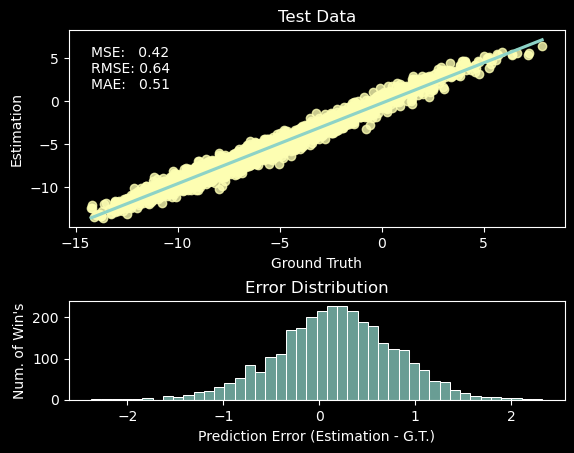

In [10]:
fn.evaluate_model(y_train, y_val, y_test, y_train_pred, y_val_pred, y_test_pred)

Previous example: [/examples/time_series/cases/6.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/6.ipynb)  
Next example: [/examples/time_series/cases/8.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/time_series/cases/8.ipynb)